In [17]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
africa_data = pd.read_csv("data/Data_Africa.csv")

In [3]:
# Inspect the dataframe
africa_data.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [5]:
# Impute missing values in the "GDP (USD)" column using the mean value
mean_gdp = africa_data["GDP (USD)"].mean()
africa_data["GDP (USD)"].fillna(mean_gdp, inplace=True)

In [8]:
# Remove the extra space in the column name
africa_data.columns = africa_data.columns.str.strip()
# Calculate the average population and GDP values for each year
average_values = africa_data.groupby("Year")[["Population", "GDP (USD)"]].mean()
print(average_values)

        Population     GDP (USD)
Year                            
2000  1.381599e+07  1.637243e+10
2001  1.415615e+07  1.535168e+10
2002  1.450378e+07  1.561013e+10
2003  1.486030e+07  1.798805e+10
2004  1.522666e+07  2.084327e+10
2005  1.560575e+07  2.385145e+10
2006  1.599692e+07  2.730732e+10
2007  1.640101e+07  3.097633e+10
2008  1.681782e+07  3.493962e+10
2009  1.724966e+07  3.350326e+10
2010  1.769520e+07  3.869319e+10
2011  1.815526e+07  4.257942e+10
2012  1.862910e+07  4.585017e+10
2013  1.911805e+07  4.709637e+10
2014  1.961888e+07  4.853782e+10
2015  2.013093e+07  4.425540e+10
2016  2.065271e+07  4.269412e+10
2017  2.118605e+07  4.396220e+10
2018  2.172813e+07  4.569691e+10
2019  2.227849e+07  4.729946e+10
2020  2.283529e+07  4.552748e+10
2021  2.342151e+07  5.036714e+10
2022  2.402366e+07  5.381986e+10


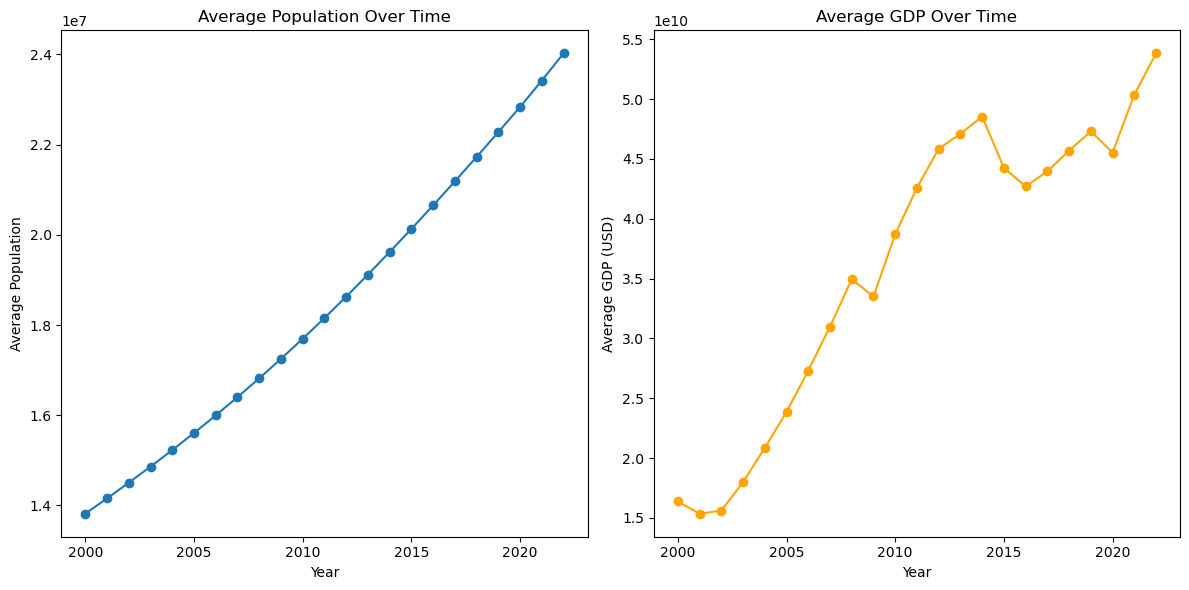

In [9]:
# Create line plots to visualize the trends over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(average_values.index, average_values["Population"], marker='o')
plt.title("Average Population Over Time")
plt.xlabel("Year")
plt.ylabel("Average Population")

plt.subplot(1, 2, 2)
plt.plot(average_values.index, average_values["GDP (USD)"], marker='o', color='orange')
plt.title("Average GDP Over Time")
plt.xlabel("Year")
plt.ylabel("Average GDP (USD)")

plt.tight_layout()
plt.show()

In [11]:
# Calculate the percentage change in population and GDP for each year
africa_data["Population Change (%)"] = africa_data.groupby("Country")["Population"].pct_change() * 100
africa_data["GDP Change (%)"] = africa_data.groupby("Country")["GDP (USD)"].pct_change() * 100

# Print the updated DataFrame or select specific columns
print(africa_data[["Country", "Year", "Population Change (%)", "GDP Change (%)"]])

     Country  Year  Population Change (%)  GDP Change (%)
0     Uganda  2000                    NaN             NaN
1     Uganda  2001               3.087191       -5.695606
2     Uganda  2002               3.158330        0.000000
3     Uganda  2003               3.211815       13.121820
4     Uganda  2004               3.229335       20.169920
...      ...   ...                    ...             ...
1329    Togo  2018               2.492837        9.909291
1330    Togo  2019               2.462638       -0.520136
1331    Togo  2020               2.436155        5.672708
1332    Togo  2021               2.667996       12.784896
1333    Togo  2022               2.668002       -2.491083

[1334 rows x 4 columns]


In [14]:
# Identify years with significant changes or spikes
significant_changes = africa_data[
    (africa_data["Population Change (%)"] > 0.02) |
    (africa_data["GDP Change (%)"] > -0.01)
    ]
significant_changes

,ID,Year,Country,Continent,Population,GDP (USD),Population Change (%),GDP Change (%)
1,2,2001,Uganda,East Africa,24022603,5.840504e+09,3.087191,-5.695606
2,3,2002,Uganda,East Africa,24781316,5.840504e+09,3.158330,0.000000
3,4,2003,Uganda,East Africa,25577246,6.606884e+09,3.211815,13.121820
4,5,2004,Uganda,East Africa,26403221,7.939488e+09,3.229335,20.169920
5,6,2005,Uganda,East Africa,27256493,9.239222e+09,3.231697,16.370505
...,...,...,...,...,...,...,...,...
1329,1330,2018,Togo,West Africa,7794569,7.029218e+09,2.492837,9.909291
1330,1331,2019,Togo,West Africa,7986521,6.992656e+09,2.462638,-0.520136
1331,1332,2020,Togo,West Africa,8181085,7.389329e+09,2.436155,5.672708
1332,1333,2021,Togo,West Africa,8399356,8.334047e+09,2.667996,12.784896


In [15]:
# Calculate the correlation coefficient between population and GDP
correlation = africa_data["Population"].corr(africa_data["GDP (USD)"])
print("Correlation between Population and GDP:", correlation)

Correlation between Population and GDP: 0.7352852773919322


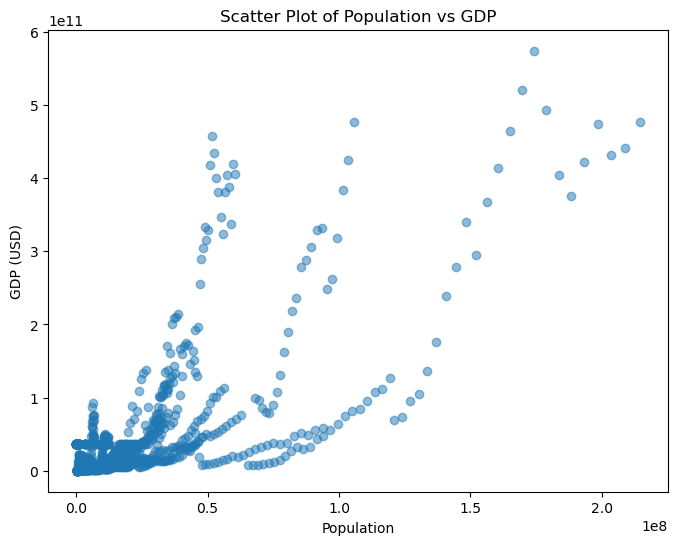

In [16]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(africa_data["Population"], africa_data["GDP (USD)"], alpha=0.5)
plt.title("Scatter Plot of Population vs GDP")
plt.xlabel("Population")
plt.ylabel("GDP (USD)")
plt.show()

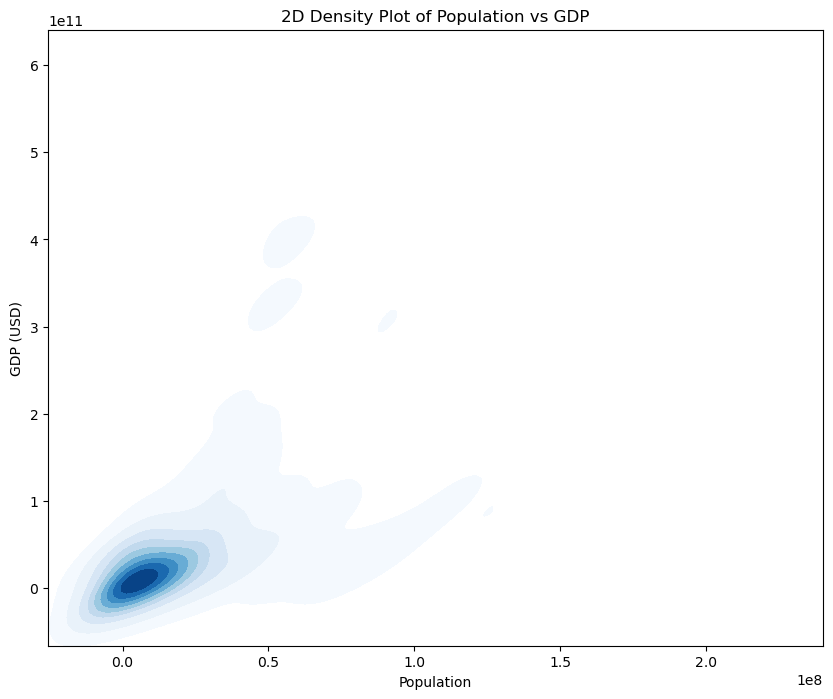

In [19]:
# Create a 2D density plot
plt.figure(figsize=(10, 8))
sns.kdeplot(data=africa_data, x="Population", y="GDP (USD)", cmap="Blues", fill=True)
plt.title("2D Density Plot of Population vs GDP")
plt.xlabel("Population")
plt.ylabel("GDP (USD)")
plt.show()

In [24]:
# years and countries interested in analyzing
years_of_interest = [2005, 2010, 2015, 2020]
countries_of_interest = ["Nigeria", "South Africa", "Algeria"]

In [25]:
# Filter the data for the selected years and countries
filtered_data = africa_data[africa_data["Year"].isin(years_of_interest) & africa_data["Country"].isin(countries_of_interest)]

In [26]:
# Calculate the growth rates for the selected years and countries
growth_rates = filtered_data.pivot(
    index="Year", columns="Country", values=["Population", "GDP (USD)"]
).pct_change() * 100

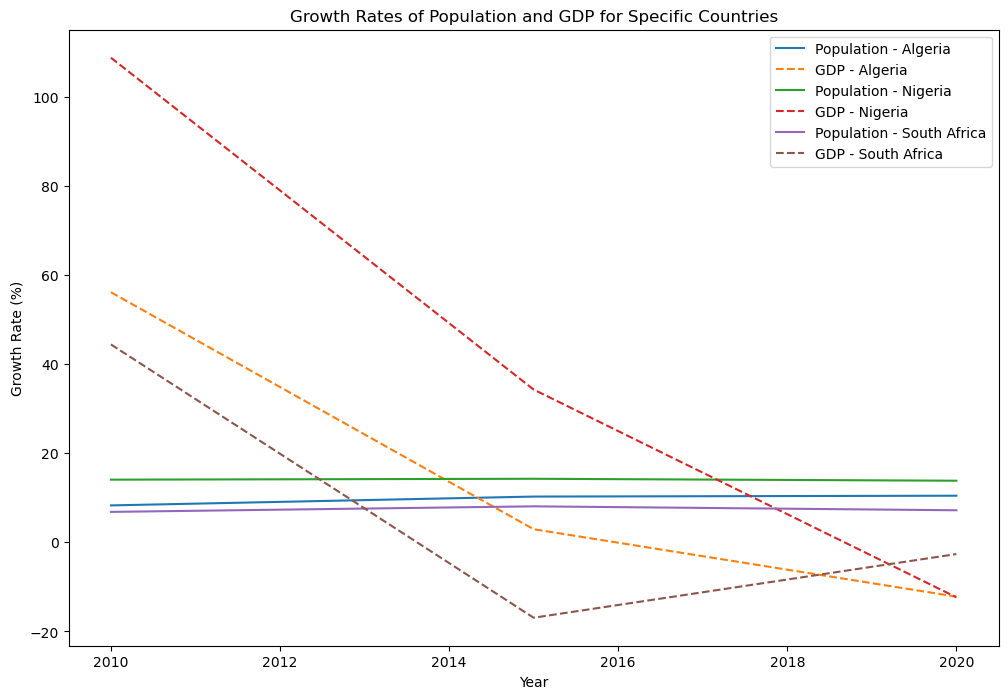

In [27]:
# Visualize the growth rates using line plots
plt.figure(figsize=(12, 8))
for col in growth_rates.columns.levels[1]:
    plt.plot(growth_rates.index, growth_rates[("Population", col)], label=f"Population - {col}")
    plt.plot(growth_rates.index, growth_rates[("GDP (USD)", col)], label=f"GDP - {col}", linestyle='dashed')

plt.title("Growth Rates of Population and GDP for Specific Countries")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.show()